V
41 out of the last 60 days
30 of of the last 30.0 days


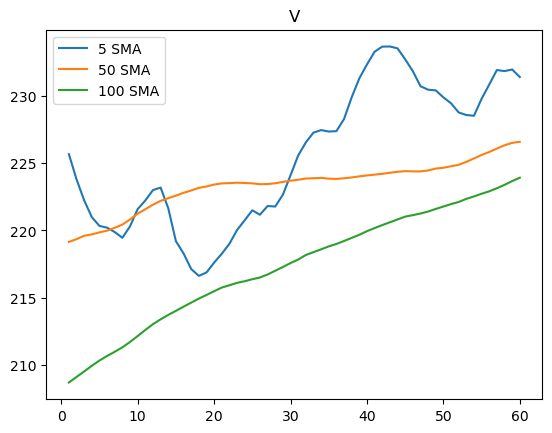

AAL
123
123 stock not valid
F
K
KO
UL
42 out of the last 60 days
30 of of the last 30.0 days


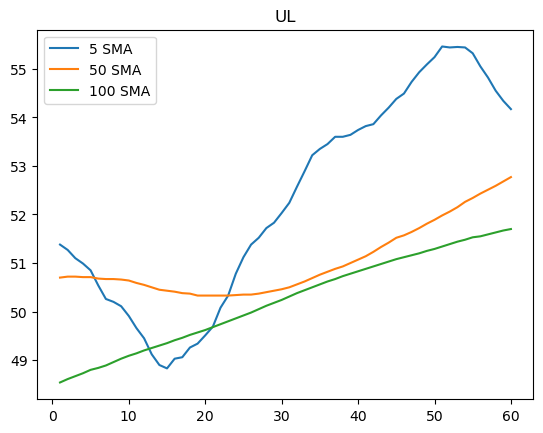

JNJ
TITN
ET


In [2]:
import json
import requests
import math

import matplotlib.pyplot as plt
import numpy as np

import time

# importing module
from pandas import *

watchList=[]
#You need a api key in ordre for this to work
userKey=""

#This function takes a ticker, a series SMA, and how many days you would like to review the SMA
#It will return the the values rounded down for close prices 

def findSMA(ticker, series, daySpan):
    buildList=[]
    getSMA=requests.get("https://api.polygon.io/v1/indicators/sma/"+ticker+"?timespan=day&adjusted=true&window="+series+"&series_type=close&order=desc&limit="+daySpan+"&apiKey="+userKey)
    SMA=json.loads(getSMA.text)
    i=0
    while i < int(daySpan):
        buildList.append(round(SMA['results']['values'][i]['value'],2))
        i=i+1   
    
    return(buildList)

#This function looks at the short, medium, and long SMA 
#If short is greater than medium and medium is greater than long
#days in range is increased
#The higher the days in range the more likely the stock is moving upwards
#

def checkSpread(short, med, long):
    daysInRange=0
    trendList=[]

    for x in range(len(short)):
        if short[x]>med[x]:
            if med[x]>long[x]:
                daysInRange=daysInRange+1
                trendList.append(1)
            else:
                trendList.append(0)
        else:
            trendList.append(0)
    
    startIndex=int(daySpan/2)
    endIndex=len(trendList)-1
            
#     sum(your_list[a:b + 1])
    recentHalf=sum(trendList[startIndex:endIndex + 1])
            
    return(daysInRange, recentHalf)


def printGraph(short, med, long, ticker):
    #Creates a list for the x axis and represents the number of entries for the moving averages 
    daysList=[]
    for i in range(daySpan):
        daysList.append(i+1)
    # xpoints = np.array(daysList)
    # ypoints = np.array(list1)

    # plt.plot(xpoints, ypoints)
    # plt.show()

    x1 = np.array(daysList)
    y1 = np.array(short)
    x2 = np.array(daysList)
    y2 = np.array(med)
    x3 = np.array(daysList)
    y3 = np.array(long)
  
    plt.plot(x1, y1,x2, y2, x3, y3)
    plt.title(ticker)
    plt.legend(['5 SMA', '50 SMA', '100 SMA'], loc='upper left')
    plt.show()




# stockSearch=input("Please input the ticker sybmol: ")
# daySpan=int(input("Input how many days you would like to review: "))

daySpan=60

listOfStocks=["V","AAL","123","F","K","KO", "UL", "JNJ", "TITN", "ET"]

# reading CSV file
data = read_csv("symbols.csv")
 
# converting column data to list
#listOfStocks = data['Symbol'].tolist()

 
# printing list data
# print(tickerList)

for stock in listOfStocks:
    stockSearch = stock
    print(stock)

    try:
        sma5=findSMA(stockSearch,"5",str(daySpan))
        time.sleep(13)
        sma50=findSMA(stockSearch,"50",str(daySpan))
        time.sleep(13)
        sma100=findSMA(stockSearch,"100",str(daySpan))
        time.sleep(13)
    
    except:
        print(stock + " stock not valid")
        time.sleep(13)


    else:    
        sma5.reverse()
        sma50.reverse()
        sma100.reverse()


        goodDays, last30 =(checkSpread(sma5,sma50,sma100))

        if last30 >= 25:
            print(goodDays, "out of the last "+str(daySpan)+" days")
            print(last30, "of of the last "+str(daySpan/2)+" days")

            printGraph(sma5,sma50,sma100,stock)
            watchList.append(stock)

        